# JNB Lab Solutions

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

**Demo 1 Exercise**

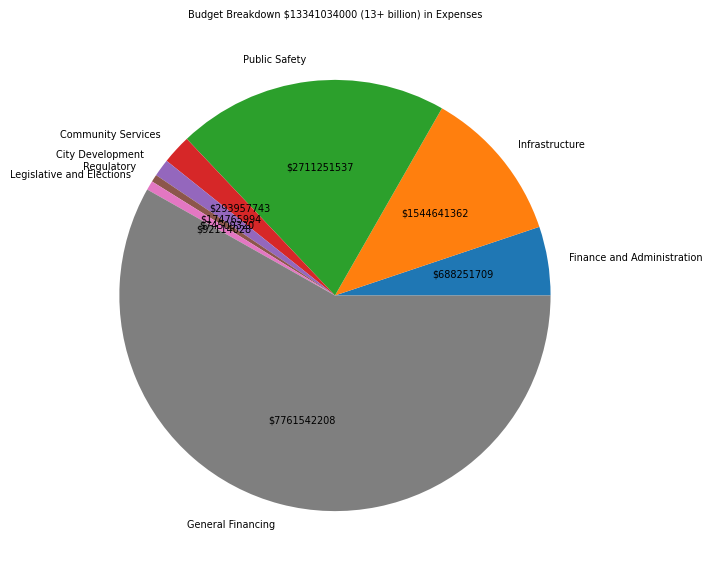

In [4]:
budget=pd.read_excel('ChicagoBudget.xlsx')

fig, ax = plt.subplots(figsize=(7,7)) #you can adjust the figsize  (5,5)=(length,width)
plt.rcParams['font.size'] = 7  #fontsize
budget_items = budget["EXPENSE"] #categories
budget_amounts = budget["2023 BUDGET"] #amounts
total=sum(budget_amounts)
ax=plt.pie(budget_amounts,labels=budget_items,autopct=lambda p: '${:.0f}'.format(p * total / 100)) #make pie chart  autopct='%1.0f%%'
plt.gca().set_title('Budget Breakdown $'+str(total)+' (13+ billion) in Expenses',size=7) #add a title
fig.savefig('Budget.png') #save the piechart to a file Budget.png

**Demo 2 Exercise**


In [5]:
# PACKAGE: DO NOT EDIT THIS CELL
%matplotlib inline
from ipywidgets import interact
import cv2, os

In [6]:
def makepixelimage(folder, N):

    directory = folder

    # A data structure called a dictionary is used to store the image data and the dataframes we'll make from them.
    imgs = {}
    dfs = {}

    # Specify the pixel image size 
    dsize = (N, N)

    # This will iterate over every image in the directory given, read it into data, and create a 
    # dataframe for it. Both the image data and its corresponding dataframe are stored.
    # Note that when being read into data, we interpret the image as grayscale. 
    pos = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            imgs[pos] = cv2.imread(f, 0) # image data
            imgs[pos] = cv2.resize(imgs[pos], dsize)
            dfs[pos] = pd.DataFrame(imgs[pos]) # dataframe
            pos += 1
    return plt.imshow(imgs[0], cmap="gray")


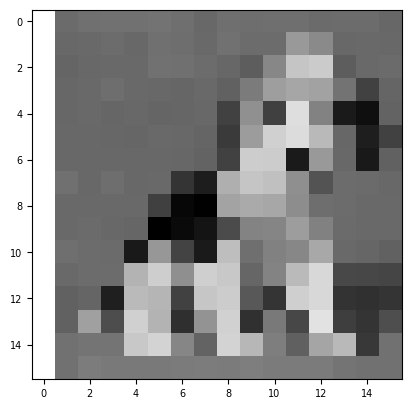

In [7]:
makepixelimage("images", 16) #16x16 image

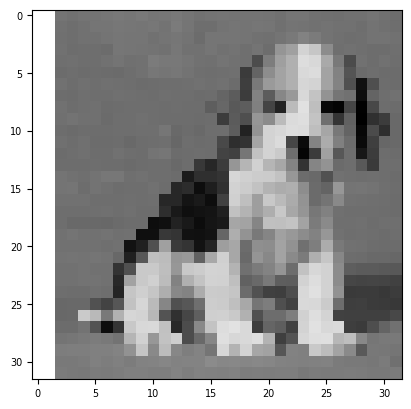

In [8]:
makepixelimage("images", 32) #32x32 image

**DEMO 3 Exercise**


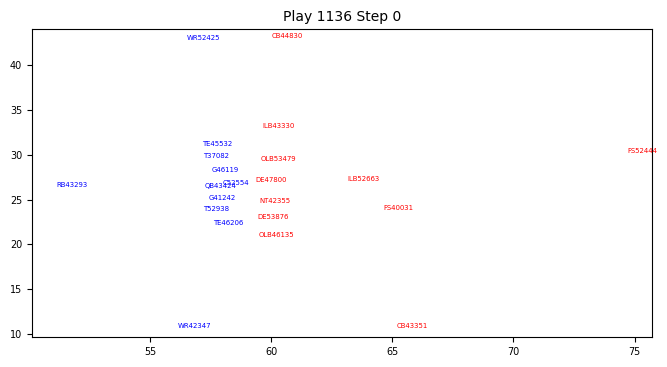

In [17]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
track_play=pd.read_excel('NFL_play.xlsx')
fig= plt.figure(figsize=(8,4))
temp=track_play[track_play["step"]==0]
xmin=temp["x_position"].min()
xmax=temp["x_position"].max()
ymin=temp["y_position"].min()
ymax=temp["y_position"].max()
plt.xlim(xmin-1,xmax+1)
plt.ylim(ymin-1,ymax+1)
for i in temp.index:
    x=temp.loc[i,"x_position"]
    y=temp.loc[i,"y_position"]
    n=temp.loc[i,"nfl_player_id"]
    p=temp.loc[i,"position"]
    if temp.loc[i,"team"]=='home':
        plt.text(x, y, p+str(n),color='b',size=5)
    else:
        plt.text(x, y, p+str(n),color='r',size=5)
plt.title("Play 1136 Step 0",size=10)
plt.show()

The wide receiver at the top is 52425 and cornerback is 44830.

In [63]:
def playerpositions(data,play,player1,player2,position1,position2,step):
    playdf=data[data["play_id"]==play]
    playdf = playdf.sort_values(by = 'step')
    playdf=playdf.reset_index(drop=True)
    player1df=playdf[playdf["nfl_player_id"]==player1]
    player1df = player1df.sort_values(by = 'step')
    player1df=player1df.reset_index(drop=True)
    player2df=playdf[playdf["nfl_player_id"]==player2]
    player2df = player2df.sort_values(by = 'step')
    player2df=player2df.reset_index(drop=True)
    fig= plt.figure(figsize=(5,3))
    plt.xlim(xmin-1,xmax+5)
    plt.ylim(ymin-1,ymax+5)
    x1=player1df.loc[step+108,"x_position"]
    y1=player1df.loc[step+108,"y_position"]
    x2=player2df.loc[step+108,"x_position"]
    y2=player2df.loc[step+108,"y_position"]
    plt.text(x1,y1,position1,color='b')
    plt.text(x2,y2,position2,color='r')
    plt.savefig(str(step)+'.png') 
    return 

In [ ]:
frames=73
for step in np.arange(0,frames,1):
    playerpositions(track_play,1136,52425,44830,'WR','CB',step)


In [66]:
from PIL import Image
images = []
for n in range(frames):
    exec('a'+str(n)+'=Image.open("'+str(n)+'.png")')
    images.append(eval('a'+str(n)))
images[0].save('2player.gif',
               save_all=True,
               append_images=images[1:],
               duration=5,
               loop=0)

<img src="2player.gif" width="700" align="center">

**Demo 4 Exercise**

In [67]:
import wordcloud
#Define a function which counts the interesting words
def calculate_frequencies(textfile):
    #list of punctuations
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    #list of uninteresting words 
    uninteresting_words = ["AND","BY","IT","THE","THAT","A","IS","HAD","TO","NOT","BUT","FOR","OF","WHICH","IF","IN","ON","WERE","YE","THOU"]
    
     # removes punctuation and uninteresting words
    import re
    fc1=str(textfile)
    fc2= fc1.split(' ')
    for i in range(len(fc2)): 
        fc2[i] = fc2[i].upper()
    #Remove punctuations
    fc3 = []
    for s in fc2:
        if not any([o in s for o in punctuations]):
            fc3.append(s)
    #Remove uninteresting words
    fc4=[]
    for s in fc3:
        if not any([o in s for o in uninteresting_words]):
            fc4.append(s)
    fc5=[]
    for s in fc4:
        if not any([o.lower() in s for o in uninteresting_words]):
            fc5.append(s)
            
    while('' in fc5) : 
        fc5.remove('') 
        
    import collections
    fc6 = collections.Counter(fc5)

    #wordcloud
    cloud = wordcloud.WordCloud( max_words = 15)  #can adjust the number of words
    cloud.generate_from_frequencies(fc6)
    return cloud.to_array()

<IPython.core.display.Javascript object>


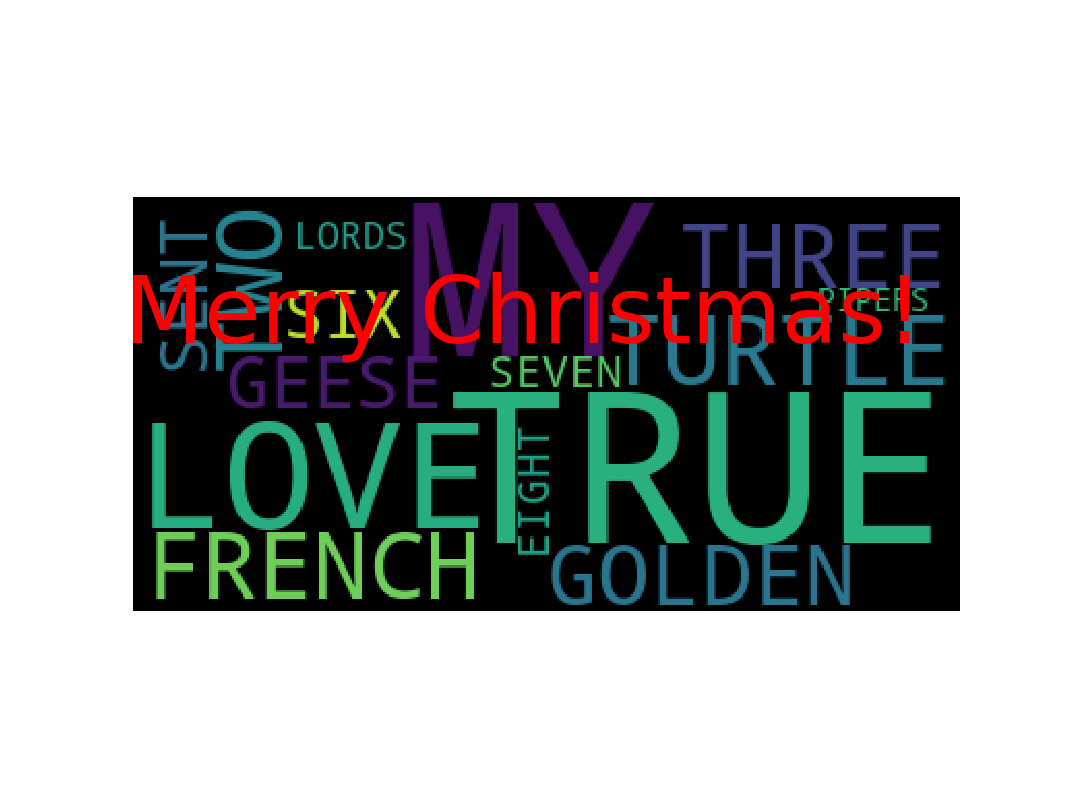

In [68]:
import matplotlib.pyplot as plt
%matplotlib notebook
#Open the text file with the words to be plotted.
with open('twelvedays.txt','r') as file:  
    carol = file.readlines()
    
#make the wordcloud   
carol = calculate_frequencies(carol)
plt.imshow(carol, interpolation = 'nearest')
plt.text(-5,70,"Merry Christmas!",color='r',size=40) #***TASK 2***Add Christmas! after Merry
plt.axis('off')
plt.savefig('card.png', bbox_inches='tight') 


**Demo 5 Exercise**

In [69]:
import numpy as np

def play(freq):
    import numpy as np
    from IPython.display import Audio  #library used to create sounds
    sampling_rate = 44100 # <- rate of sampling
    t = np.linspace(0, 2,  sampling_rate) # <- setup time values
    sound_wave = np.sin(2 * np.pi * freq * t) # <- sine function formula
    return Audio(sound_wave, rate=sampling_rate, autoplay=True) # play the generated sound

from IPython.display import Audio 
rest=0
do=220
re=9/8*220
mi=5/4*220
fa=4/3*220
so=3/2*220
la=5/3*220
ti=15/8*220
do1=2*220
re1=2*9/8*220
mi1=2*5/4*220
fa1=2*4/3*220
so1=2*3/2*220
la1=2*5/3*220
ti1=2*15/8*220
do2=2*2*220
scale=[do,re,mi,fa,so,la,ti,do1]

def play(song):
    song=np.array(song)
    framerate = 44100
    t = np.linspace(0, len(song) / 2, round(framerate * len(song) / 2))[:-1]
    song_idx = np.floor(t * 2).astype(int)
    data = np.sin(2 * np.pi * song[song_idx] * t)
    return Audio(data, rate=framerate, autoplay=True)


In [70]:
jingle= [mi, rest,mi ,rest, mi, rest,rest, mi,rest, mi,rest,mi,rest,rest,mi, mi,so ,so, do,do, re,re, mi,mi]
play(jingle)